In [9]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import seaborn as sns
import matplotlib.pyplot as plt


## Read tables

In [2]:
SEP_cat=Table.read('./data/dmu26_XID+MIPS_AKARI-SEP_cat.fits')

In [3]:
SEP_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J043429.210-545654.901,68.62170653034099,-54.94858348648463,80.42802,113.913284,49.530167,0.002208595,5.1016723e-06,1.0022461,680.5849,0.0
HELP_J043423.165-545626.480,68.59652177460741,-54.94068890812353,55.272625,84.64747,26.577156,-0.0012659467,4.908135e-06,1.0029539,1063.1514,0.001
HELP_J043416.087-545549.460,68.56703012381632,-54.93040549335446,10.661816,26.498941,2.7642608,-0.0012659467,4.908135e-06,0.99987483,1812.1738,0.0
HELP_J043424.834-545603.188,68.6034770052052,-54.934218985884876,27.242163,49.51786,9.029449,-0.0012659467,4.908135e-06,1.0007945,1698.6595,0.0
HELP_J043418.700-545621.169,68.57791531857676,-54.939213555347365,347.0184,376.3759,317.50742,-0.0012659467,4.908135e-06,1.001546,1373.7151,0.463
HELP_J043419.811-545645.131,68.58254550848122,-54.9458696905712,212.85785,241.46736,186.06978,-0.0012659467,4.908135e-06,0.99938905,2057.627,0.003
HELP_J043424.458-545559.494,68.60190668409987,-54.93319268410401,21.687775,45.13706,6.4285336,-0.0012659467,4.908135e-06,1.0014269,1901.6733,0.001
HELP_J043418.300-545543.616,68.5762489879036,-54.9287820921008,7.165051,17.531206,1.9945031,-0.0012659467,4.908135e-06,0.99980235,1944.1476,0.006


## Look at Symmetry of PDFs to determine depth level of catalogue

4.3571267


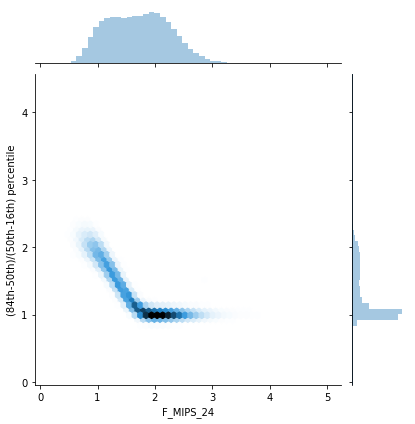

In [10]:
skew=(SEP_cat['FErr_MIPS_24_u']-SEP_cat['F_MIPS_24'])/(SEP_cat['F_MIPS_24']-SEP_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(SEP_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))
plt.axvline(1.7, 0)
g.savefig('../../data/figs/sk_MIPS_AKARI-SEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_AKARI-SEP.png', bbox='tight')


Both seem to have flux pdfs that become Gaussian at ~40$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [11]:
from astropy.table import Column
SEP_cat.add_column(Column(np.zeros(len(SEP_cat), dtype=bool),name='flag_mips_24'))


In [12]:
ind_SEP=(SEP_cat['Pval_res_24']>0.5) | (SEP_cat['F_MIPS_24'] < 40.0)

In [13]:
SEP_cat['flag_mips_24'][ind_SEP]=True


In [14]:
SEP_cat.write('./data/dmu26_XID+MIPS_AKARI-SEP_cat_20190909.fits', format='fits',overwrite=True)